In [1]:
import numpy as np
from albumentations.pytorch.transforms import ToTensorV2
from PIL import Image
# from image_to_latex.lit_models import LitResNetTransformer
from models.resnet_transformer import ResNetTransformer
import torch
from create_model import Img2Seq

/root/miniconda3/envs/py38_copy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weight_path = r'./checkpoint.pt'
img2seq_model, loss_fn, tokenizer = Img2Seq(d_model=128, dim_feedforward=256, nhead=8,
                                          dropout=0.3, num_decoder_layers=3,
                                          max_output_len=150,
                                          vocab_path='data_warehouse/vocab.json'
                                          )
img2seq_model.eval()
img2seq_model.load_state_dict(torch.load(weight_path))


/root/miniconda3/envs/py38_copy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/envs/py38_copy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [26]:
transform = ToTensorV2()
# file_path = r'./data_warehouse/train_raw/2012020616404276_system_index_0_staff_0_measure_0.jpg'
# file_path = r'/usr/hsc_project/latexOCR/img2seq_pytorch/data_warehouse/train_raw/2012020616404276_system_index_2_staff_0_measure_6.jpg'
file_path = r'/usr/hsc_project/latexOCR/img2seq_pytorch/data_warehouse/test_raw/2012020616404675_system_index_6_staff_0_measure_1.jpg'
file_path = r'data_warehouse/test_raw/2012070618150265_system_index_9_staff_0_measure_1.jpg'
file_path = r'data_warehouse/test_raw/2012070618362307_system_index_5_staff_0_measure_4.jpg'
file_path = r'data_warehouse/test_raw/2012070618365849_system_index_8_staff_0_measure_2.jpg'
file_path = r'data_warehouse/test_raw/2012070618374608_system_index_2_staff_0_measure_3.jpg'
file_path = r'data_warehouse/test_raw/2012070618375329_system_index_4_staff_0_measure_4.jpg'
image = Image.open(file_path).convert("RGB")
image_tensor = transform(image=np.array(image))["image"]  # type: ignore
# pred = img2seq_model(image_tensor.unsqueeze(0).float())[0]  # type: ignore
# with torch.no_grad(): # 暂时先不加
pred = img2seq_model.predict(image_tensor.unsqueeze(0).float())[0]
print(f'len:{len(pred)},raw-pred:{pred}')
decoded = tokenizer.decode(pred.tolist())
decoded_str = " ".join(decoded)
print(f'decoded_str:{decoded_str}')


len:152,raw-pred:tensor([ 1, 27, 10,  5, 43, 28, 27, 10,  9, 28, 27, 10,  9, 28,  2,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0])
decoded_str:< 6 1 ' > < 6 5 > < 6 5 >


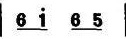

In [27]:
image

In [1]:
import torch

In [11]:
a = torch.randn(1)
b = torch.BoolTensor([True])
print(f'a:{a},b:{b},a[b]:{a[b]}')

a:tensor([-2.1383]),b:tensor([True]),a[b]:tensor([-2.1383])


In [12]:
a = torch.randn(1)
b = torch.BoolTensor([False])
print(f'a:{a},b:{b},a[b]:{a[b]}')

a:tensor([-0.0880]),b:tensor([False]),a[b]:tensor([])


In [17]:
a[b]=torch.ones(1)
a[b]

tensor([])

In [16]:
torch.ones(1)

tensor([1.])